In [2]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
%matplotlib inline
import numpy as np # linear algebra
import seaborn as sns #statistical data visualization
sns.set(style='whitegrid')
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

In [3]:
#https://gist.githubusercontent.com/curran/a08a1080b88344b0c8a7/raw/639388c2cbc2120a14dcf466e85730eb8be498bb/iris.csv
#link to download the CSV file
#line1-------------
Iris = pd.read_csv("iris.csv")
Iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
Iris.shape

(150, 5)

In [5]:
#since we are gonna perform binary classification using Logistic Regression we will only include first 100 samples which consists of irises’ (Setosa and Versicolour)
#line2-------------
Iris=Iris[:100]
Iris.shape

(100, 5)

In [6]:
'''Step 2: Numerical processing
replace 'Iris-setosa' as 0
replace 'Iris-versicolor' as 1'''
#line3-------------------------
Iris.replace(to_replace="setosa", value=0, inplace=True)
Iris.replace(to_replace="versicolor", value=1, inplace=True)

In [7]:
Iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [8]:
#visualization of given dataset
#codesegment4------------------
x1 = np.array(Iris.loc[(Iris["species"] == 0), "sepal_length"])
y1 = np.array(Iris.loc[(Iris["species"] == 0), "sepal_width"])
x2 = np.array(Iris.loc[(Iris["species"] == 1), "sepal_length"])
y2 = np.array(Iris.loc[(Iris["species"] == 1), "sepal_width"])

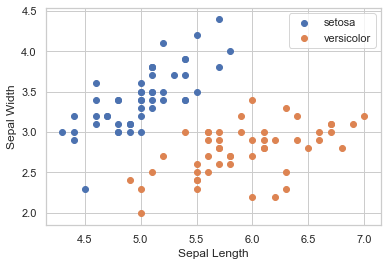

In [9]:
plt.scatter(x1,y1, label="setosa")
plt.scatter(x2, y2, label="versicolor")

plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend(loc='best')
plt.show()

In [10]:
X = Iris.drop(labels=['species'], axis=1).values #feature matrix
Y = Iris.species.values #output

In [11]:
shuffled = np.random.permutation(len(Iris))
test_index = shuffled[:20]
train_index = shuffled[20:]

train_X = X[train_index]
train_y = Y[train_index]
test_X = X[test_index]
test_y = Y[test_index]

In [12]:
# Define the min-max normalization function
def min_max_normalized(data):
# we are using here min-max normalisation, helpful to bring down every values in all the feature columns of the dataset to common scale 
#codesegment8------------------
    min=np.min(data)
    max=np.max(data)
    mean=np.mean(data)
    list=[]
    list.append((i-mean)/(max-min) for i in data)
    return list        

In [13]:
# Begin building the model framework
# Declare the variables that need to be learned and initialization
# There are 4 features here, so W's dimension is (4, 1)
#line9---------------------------- #weights
W = tf.Variable(tf.random_normal(shape=[4,1]))
b = tf.Variable(tf.random_normal(shape=[1, 1])) #bias
#constructor for random initialization
#line10
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

In [14]:
# Define placeholders
data = tf.placeholder(dtype=tf.float32, shape=[None, 4])
#comment on the difference between tf.placeholder and tf.variable-----
#Placeholders are initially empty and are used to feed the training samples to the model.
#Variables can be updated after initialization unlike placeholders.
target = tf.placeholder(dtype=tf.float32, shape=[None, 1])

In [15]:
train_X = train_X.astype('float32')

In [16]:
# Declare the 'model' you need to learn
#line11-------------------------------------------
mod = tf.add(tf.matmul(data, W), b)

In [17]:
# Declare loss function
# Use the sigmoid cross-entropy loss function,
# first doing a sigmoid on the model result and then using the cross-entropy loss function
loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=mod, labels=target))

In [18]:
# Define the learning rate， batch_size and number of iterations.
learning_rate = 0.01
batch_size = 30 #using batch makes the training ------?
iter_num = 1500

In [19]:
# Define the optimizer with name opt
#line14-----------------------------
opt = tf.train.GradientDescentOptimizer(learning_rate = learning_rate)
# Define the goal
goal = opt.minimize(loss)

In [20]:
# Define the accuracy
# The default threshold is 0.5, rounded off directly
prediction = tf.round(tf.sigmoid(mod))
# Bool into float32 type
correct = tf.cast(tf.equal(prediction, target), dtype=tf.float32)
# Average
accuracy = tf.reduce_mean(correct)
# End of the definition of the model framework

In [21]:
# Start training model
# Define the variable that stores the result
loss_trace = []
train_acc = []

In [22]:
# training model using mini-batch gradient descent
for epoch in range(iter_num):
    # Generate random batch_index
    #randomnly picks up up 30 sample data from the train_X
    batch_index = np.random.permutation(len(train_X))[:30]
    batch_train_X = train_X[batch_index]
    batch_train_y = np.matrix(train_y[batch_index]).T
    sess.run(goal, feed_dict={data: batch_train_X, target: batch_train_y})
    temp_loss = sess.run(loss, feed_dict={data: batch_train_X, target: batch_train_y})
    loss_trace.append(temp_loss)
    #Similarly store train accuracy value for current epoch using sess.run
    train_acc.append(sess.run(accuracy, feed_dict={data: batch_train_X, target: batch_train_y}))
    # recode the results of loss and train accuracy
    temp_train_acc = sess.run(accuracy, feed_dict={data: batch_train_X, target: batch_train_y})
    # output
    if (epoch + 1) % 100 == 0:
        print('epoch: {:4d} loss: {:5f} train_acc: {:5f} '.format(epoch + 1, temp_loss,
                                                                          temp_train_acc))
#Write the command to calculate test accuracy:
test_y = np.matrix(test_y).T
temp_test_acc = sess.run(accuracy, feed_dict={data: test_X, target: test_y})
print("The test accuracy is: {:5f}".format(temp_test_acc))
sess.close()

epoch:  100 loss: 0.085128 train_acc: 1.000000 
epoch:  200 loss: 0.075931 train_acc: 1.000000 
epoch:  300 loss: 0.073354 train_acc: 1.000000 
epoch:  400 loss: 0.057318 train_acc: 1.000000 
epoch:  500 loss: 0.066227 train_acc: 1.000000 
epoch:  600 loss: 0.047135 train_acc: 1.000000 
epoch:  700 loss: 0.050037 train_acc: 1.000000 
epoch:  800 loss: 0.046377 train_acc: 1.000000 
epoch:  900 loss: 0.042215 train_acc: 1.000000 
epoch: 1000 loss: 0.044949 train_acc: 1.000000 
epoch: 1100 loss: 0.040813 train_acc: 1.000000 
epoch: 1200 loss: 0.034657 train_acc: 1.000000 
epoch: 1300 loss: 0.037628 train_acc: 1.000000 
epoch: 1400 loss: 0.031106 train_acc: 1.000000 
epoch: 1500 loss: 0.032856 train_acc: 1.000000 
The test accuracy is: 1.000000


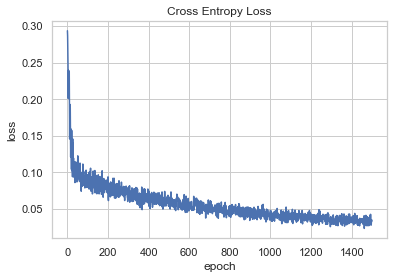

In [23]:
plt.plot(range(iter_num), loss_trace)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('Cross Entropy Loss')
plt.show()

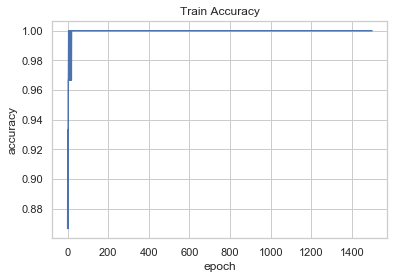

In [24]:
plt.plot(range(iter_num), train_acc)
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Train Accuracy')
plt.show()